# Bias

Bias tells us how well the mean forecast and mean observation correspond to each other. It can be used to tell us if there is an over or under-forecast tendency which can be used to inform us how a forecast system could easily be recalibrated.

`Scores` has multiplicative bias and additive bias implementations for use on continuous forecasts.

Additive bias is often called the "mean error" and can tell us the average error. It does not tell us the magnitude of the error, which means that is is possible for there to be no bias, yet the mean absolute error which does tell you the magnitude of the error is positive.

Multiplicative bias is another option which is often best suited for forecasts and observations that have 0 as an upper or lower bound (e.g., significant wave height, or wind magnitude). This could be useful for a forecaster who wants a simple method to bias correct a wind speed forecast.

**Note:** In this tutorial we use the forecast and analysis grids that are downloaded or derived in `First_data_Fetching.ipynb`. Please run through this tutorial first to fetch data.

In [7]:
import xarray as xr
from scores.continuous import additive_bias, multiplicative_bias

In [8]:
fcst = xr.open_dataset("forecast_grid.nc")
obs = xr.open_dataset("analysis_grid.nc")

# let's select the forecast for the same timestamp as the analysis
fcst = fcst.sel(time=obs.time.values)

### Additive bias

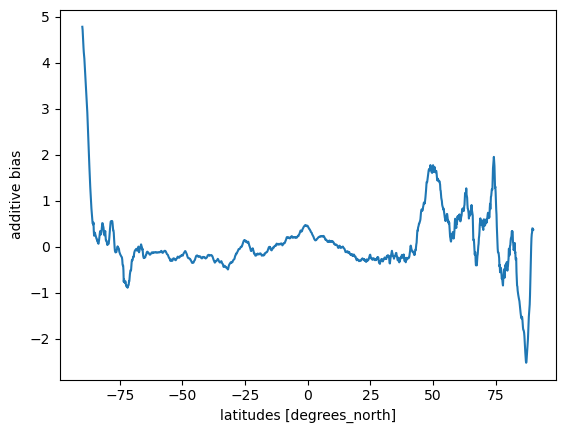

In [9]:
# Calculate additive bias and preserve the "lat" dimension
bias = additive_bias(fcst.temp_scrn, obs.temp_scrn, preserve_dims="lat")
bias.name = "additive bias"
bias.plot()

We can see how biases become larger towards the poles, but are relatively unbiased in the tropics.

### Multiplicative bias

Let's imagine that our data has a lower bound at zero and we want to calculate the multiplicative bias. To avoid download more data, we will convert the temperature data to be degrees Celcius and clip the data to have a minimum value of zero. Readers may wish to explore the data available from the NCI server and download a wind grid instead for this example

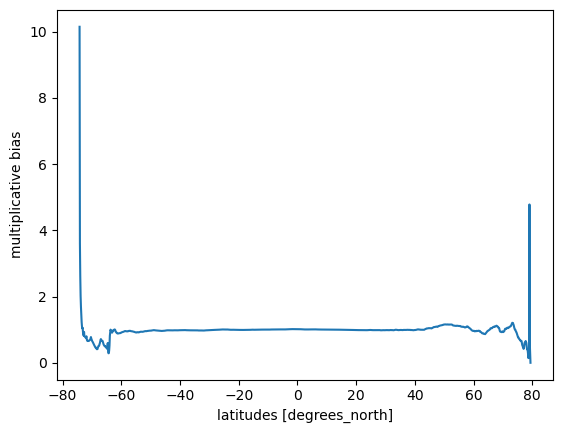

In [10]:
# Convert to Celcius and clip data to have a minimum value of zero
fcst_clipped = (fcst.temp_scrn - 273.15).clip(min=0)
obs_clipped = (obs.temp_scrn - 273.15).clip(min=0)

bias = multiplicative_bias(fcst_clipped, obs_clipped, preserve_dims="lat")
bias.name = "multiplicative bias"
bias.plot()

It's worth noting that for a latitude slice, if the mean forecast and mean observations is zero, then the multiplicative bias for that latitude slice will be `NaN`. If the mean forecast is greater than zero and the mean observations are zero, then the multiplicative bias for that slice is infinite. 

We can see below in our dataset that we have `np.inf` values, and `np.nan` values close to the poles where values were negative (remember that this data was temeprature data converted to degrees Celisus and clipped to have a minimum value of zero). 

In [11]:
bias.max()


<xarray.DataArray 'multiplicative bias' ()>
array(inf)

In [12]:
bias

<xarray.DataArray 'multiplicative bias' (lat: 1536)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * lat      (lat) float64 89.94 89.82 89.71 89.59 ... -89.71 -89.82 -89.94

## What to try next?
Have a look at Isotonic regression in scores to see how conditional biases can be calculated
